<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/6_SOC_distribution_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("sf")
install.packages("googledrive")
install.packages("data.table")
install.packages("ggplot2")
install.packages("randomForest")
install.packages('diptest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library('sf')
library('googledrive')
library('data.table')
library('ggplot2')
library('randomForest')
library('diptest')

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d9237def06bb5b1ef6c3e057351a5db5&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWN2RE1yQjdseEFRazMxS3drMzBpcjB6c1drYjlvMGIyMmd5XzJySmpxN1FRYzluYjEwa3JZN0s0MlZ3MzJZV0ctdUdUdyIsInN0YXRlIjoiZDkyMzdkZWYwNmJiNWIxZWY2YzNlMDU3MzUxYTVkYjUifQ==


In [4]:
# annotated SOC distributions
# https://drive.google.com/file/d/1U1FXpqE2UJrBR1ygtRyB29RcjrPUPqMl/view?usp=drive_link
drive_download(file = as_id('1U1FXpqE2UJrBR1ygtRyB29RcjrPUPqMl'), path =  '/content/annotated_combo_imputed_SOC.gpkg', overwrite = FALSE)


File downloaded:

• annotated_combo_imputed_SOC.gpkg <id: 1U1FXpqE2UJrBR1ygtRyB29RcjrPUPqMl>

Saved locally as:

• /content/annotated_combo_imputed_SOC.gpkg



In [5]:
#soc_sf <- st_read('/content/small_test_dt.gpkg')

In [6]:
# dt1 <- as.data.table(soc_sf)
# dt1[, geom := st_as_text(geom)]

Function to generate bimodal soil c distribution

 [1]  8.318573  9.309468 14.676125 10.211525 10.387863 15.145195 11.382749
 [8]  6.204816  7.939441  8.663014 41.120409 36.799069 37.003857 35.553414
[15] 32.220794 43.934566 37.489252 25.166914 38.506780 32.636043


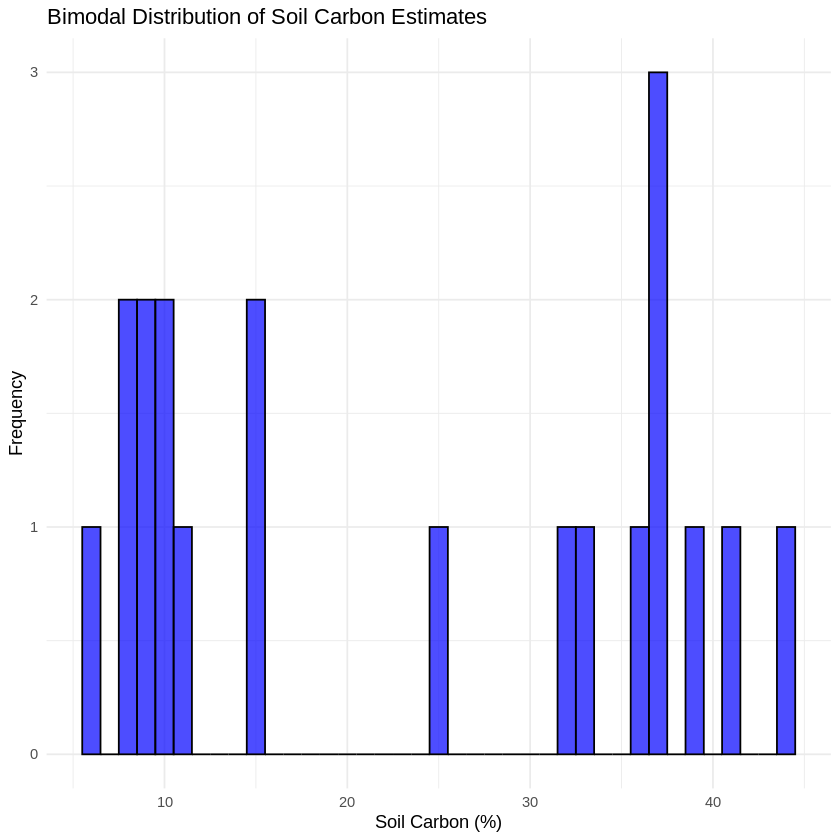

In [7]:
# Define the function to generate bimodal distribution samples
generate_bimodal_samples <- function(n = 10, min_value = 0.1, max_value = 45) {
  # Define the parameters for the two normal distributions
  mean1 <- 10  # Mean of the first normal distribution
  sd1 <- 3     # Standard deviation of the first normal distribution
  mean2 <- 35  # Mean of the second normal distribution
  sd2 <- 5     # Standard deviation of the second normal distribution

  # Generate samples from the two normal distributions
  samples1 <- rnorm(n, mean = mean1, sd = sd1)
  samples2 <- rnorm(n, mean = mean2, sd = sd2)

  # Combine the samples to create a bimodal distribution
  samples <- c(samples1, samples2)

  # Filter samples to ensure they are within the specified range
  samples <- samples[samples >= min_value & samples <= max_value]

  # If less than n samples are within the range, regenerate until we have n samples
  while (length(samples) < n) {
    additional_samples1 <- rnorm(n, mean = mean1, sd = sd1)
    additional_samples2 <- rnorm(n, mean = mean2, sd = sd2)
    additional_samples <- c(additional_samples1, additional_samples2)
    additional_samples <- additional_samples[additional_samples >= min_value & additional_samples <= max_value]
    samples <- c(samples, additional_samples)
    samples <- samples[1:n]
  }

  return(samples)
}

# Generate 10 samples
set.seed(123)  # Set seed for reproducibility
bimodal_samples <- generate_bimodal_samples()

# Print the generated samples
print(bimodal_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = bimodal_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Bimodal Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


Multimodal distribution

 [1]  3.879049  4.539645  8.117417  5.141017  5.258575  8.430130  5.921832
 [8]  2.469878  3.626294  4.108676 18.672245 16.079441 16.202314 15.332048
[15] 13.332477 20.360739 16.493551  9.100149 17.104068 13.581626 20.728705
[22] 24.128100 20.895982 22.084435 22.499843 18.253227 28.351148 25.613492
[29] 20.447452 30.015260 37.132321 33.524643 39.475628 39.390667 39.107905
[36] 38.443201 37.769588 34.690441 33.470187 33.097645


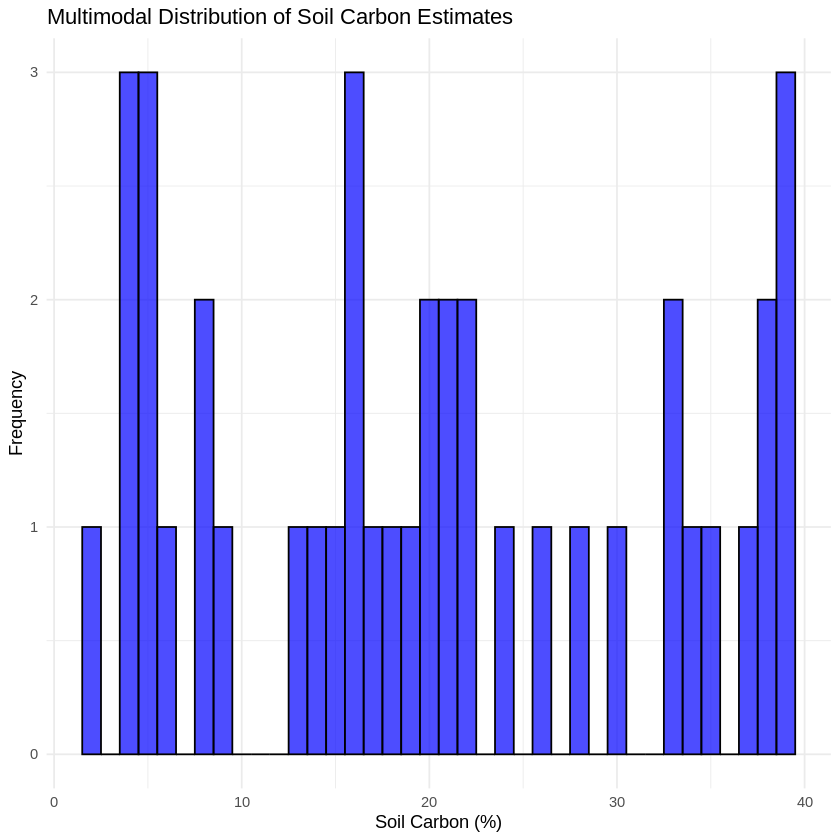

In [8]:
# Define the function to generate multimodal distribution samples
generate_multimodal_samples <- function(n = 10, min_value = 0.1, max_value = 45) {
  # Define the parameters for the normal distributions
  means <- c(5, 15, 25, 35)  # Means of the normal distributions
  sds <- c(2, 3, 4, 5)       # Standard deviations of the normal distributions

  # Generate samples from the normal distributions
  samples_list <- lapply(seq_along(means), function(i) {
    rnorm(n, mean = means[i], sd = sds[i])
  })

  # Combine the samples to create a multimodal distribution
  samples <- unlist(samples_list)

  # Filter samples to ensure they are within the specified range
  samples <- samples[samples >= min_value & samples <= max_value]

  # If less than n samples are within the range, regenerate until we have n samples
  while (length(samples) < n) {
    additional_samples_list <- lapply(seq_along(means), function(i) {
      rnorm(n, mean = means[i], sd = sds[i])
    })
    additional_samples <- unlist(additional_samples_list)
    additional_samples <- additional_samples[additional_samples >= min_value & additional_samples <= max_value]
    samples <- c(samples, additional_samples)
    samples <- samples[1:n]
  }

  return(samples)
}

# Generate 10 samples
set.seed(123)  # Set seed for reproducibility
multimodal_samples <- generate_multimodal_samples()

# Print the generated samples
print(multimodal_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = multimodal_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Multimodal Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


Normal Distribution

 [1] 19.39524 22.69823 40.58708 25.70508 26.29288 42.15065 29.60916 12.34939
 [9] 18.13147 20.54338


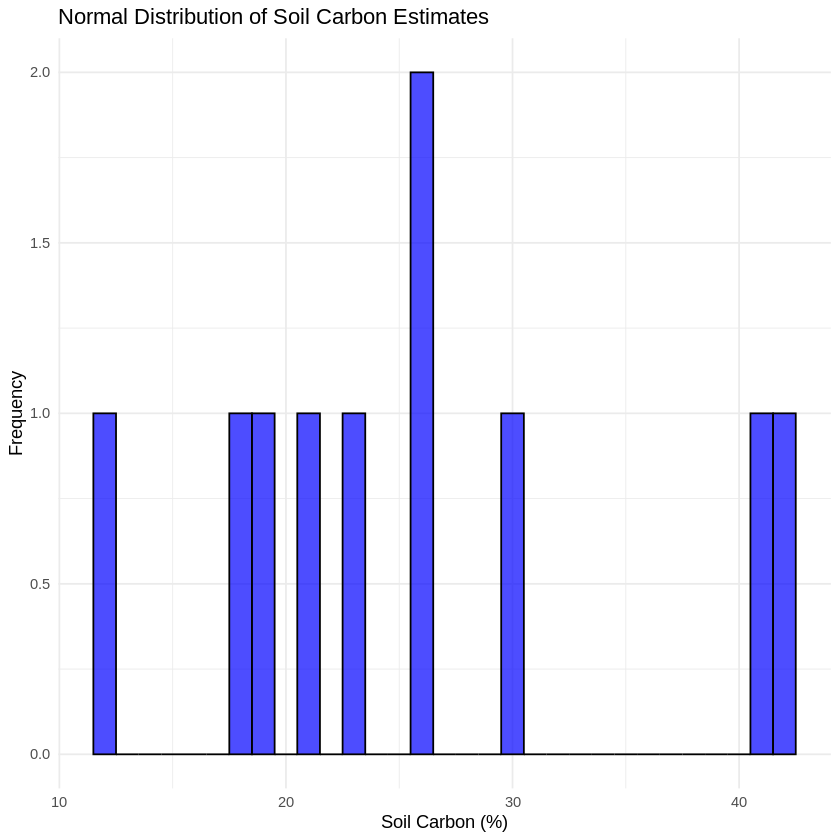

In [9]:
# Define the function to generate normally distributed samples
generate_normal_samples <- function(n = 10, mean_value = 25, sd_value = 10, min_value = 0.1, max_value = 45) {
  # Generate samples from the normal distribution
  samples <- rnorm(n, mean = mean_value, sd = sd_value)

  # Filter samples to ensure they are within the specified range
  samples <- samples[samples >= min_value & samples <= max_value]

  # If less than n samples are within the range, regenerate until we have n samples
  while (length(samples) < n) {
    additional_samples <- rnorm(n, mean = mean_value, sd = sd_value)
    additional_samples <- additional_samples[additional_samples >= min_value & additional_samples <= max_value]
    samples <- c(samples, additional_samples)
    samples <- samples[1:n]
  }

  return(samples)
}

# Generate 10 samples
set.seed(123)  # Set seed for reproducibility
normal_samples <- generate_normal_samples()

# Print the generated samples
print(normal_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = normal_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Normal Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


Right-tailed

 [1]  4.218689  5.869811 35.117807  7.928853  8.408875 41.061255 11.715540
 [8]  2.085354  3.717856  4.731953


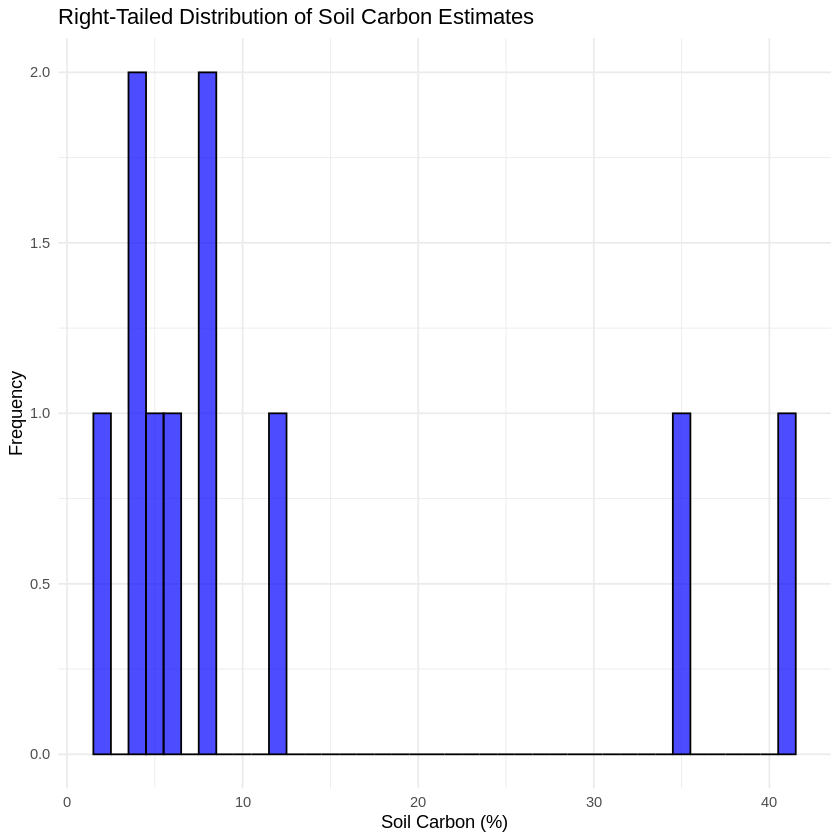

In [10]:
# Define the function to generate right-tailed distribution samples
generate_right_tailed_samples <- function(n = 10, meanlog = 2, sdlog = 1, min_value = 0.1, max_value = 45) {
  # Generate samples from the log-normal distribution
  samples <- rlnorm(n, meanlog = meanlog, sdlog = sdlog)

  # Filter samples to ensure they are within the specified range
  samples <- samples[samples >= min_value & samples <= max_value]

  # If less than n samples are within the range, regenerate until we have n samples
  while (length(samples) < n) {
    additional_samples <- rlnorm(n, meanlog = meanlog, sdlog = sdlog)
    additional_samples <- additional_samples[additional_samples >= min_value & additional_samples <= max_value]
    samples <- c(samples, additional_samples)
    samples <- samples[1:n]
  }

  return(samples)
}

# Generate 10 samples
set.seed(123)  # Set seed for reproducibility
right_tailed_samples <- generate_right_tailed_samples()

# Print the generated samples
print(right_tailed_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = right_tailed_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Right-Tailed Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


left-tailed

 [1] 42.542412 40.640328  6.946817 38.268325 37.715342  0.100000 33.906084
 [8] 45.000000 43.119368 41.951134


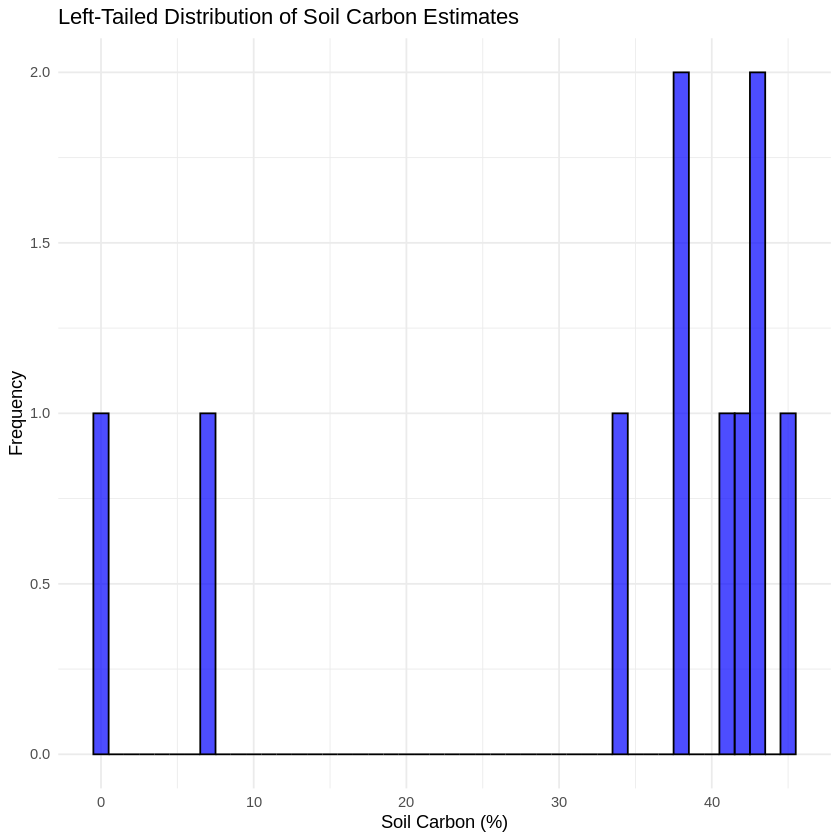

In [11]:
# Define the function to generate left-tailed distribution samples
generate_left_tailed_samples <- function(n = 10, meanlog = 2, sdlog = 1, min_value = 0.1, max_value = 45) {
  # Generate samples from the log-normal distribution
  samples <- -rlnorm(n, meanlog = meanlog, sdlog = sdlog)

  # Adjust the range to ensure values are within min_value and max_value
  samples <- scales::rescale(samples, to = c(min_value, max_value))

  # Filter samples to ensure they are within the specified range
  samples <- samples[samples >= min_value & samples <= max_value]

  # If less than n samples are within the range, regenerate until we have n samples
  while (length(samples) < n) {
    additional_samples <- -rlnorm(n, meanlog = meanlog, sdlog = sdlog)
    additional_samples <- scales::rescale(additional_samples, to = c(min_value, max_value))
    additional_samples <- additional_samples[additional_samples >= min_value & additional_samples <= max_value]
    samples <- c(samples, additional_samples)
    samples <- samples[1:n]
  }

  return(samples)
}

# Generate 10 samples
set.seed(123)  # Set seed for reproducibility
left_tailed_samples <- generate_left_tailed_samples()

# Print the generated samples
print(left_tailed_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = left_tailed_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Left-Tailed Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


uniform

 [1] 40.040315 31.206873 28.858756 44.742713 29.541190 31.913018 24.528565
 [8] 26.776977 13.083272  6.705403


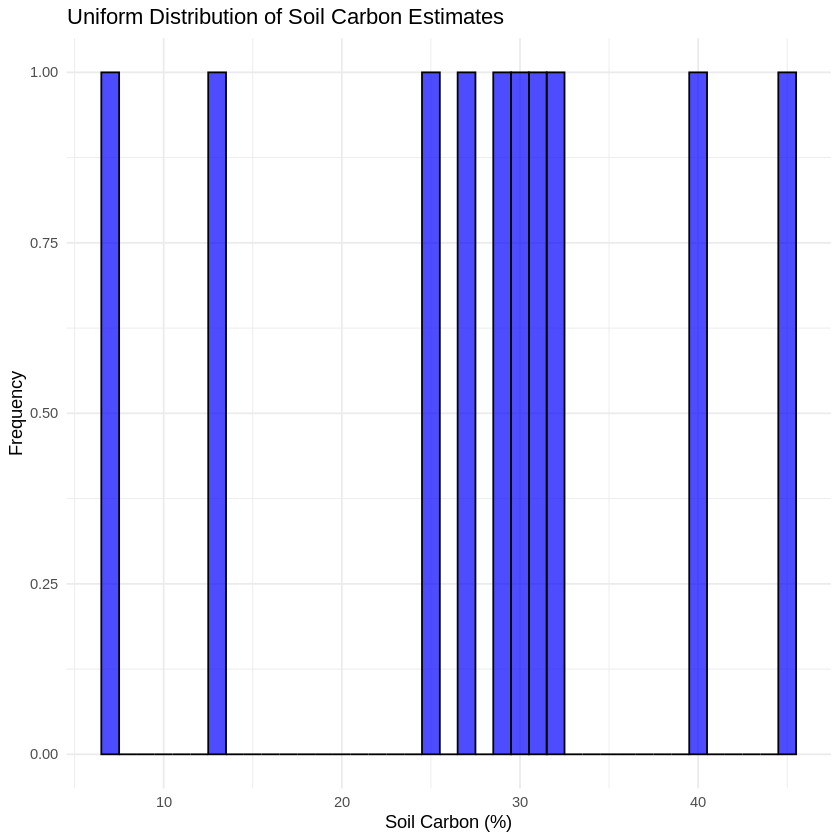

In [12]:
# Define the function to generate uniform distribution samples
generate_uniform_samples <- function(n = 10, min_value = 0.1, max_value = 45) {
  # Generate samples from the uniform distribution
  samples <- runif(n, min = min_value, max = max_value)

  return(samples)
}

# Generate 10 samples
#set.seed(123)  # Set seed for reproducibility
uniform_samples <- generate_uniform_samples()

# Print the generated samples
print(uniform_samples)

# Plot the distribution of the generated samples
ggplot(data.frame(x = uniform_samples), aes(x)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Uniform Distribution of Soil Carbon Estimates", x = "Soil Carbon (%)", y = "Frequency") +
  theme_minimal()


need to ensure consistent sample size in generator functions, so re-doing here

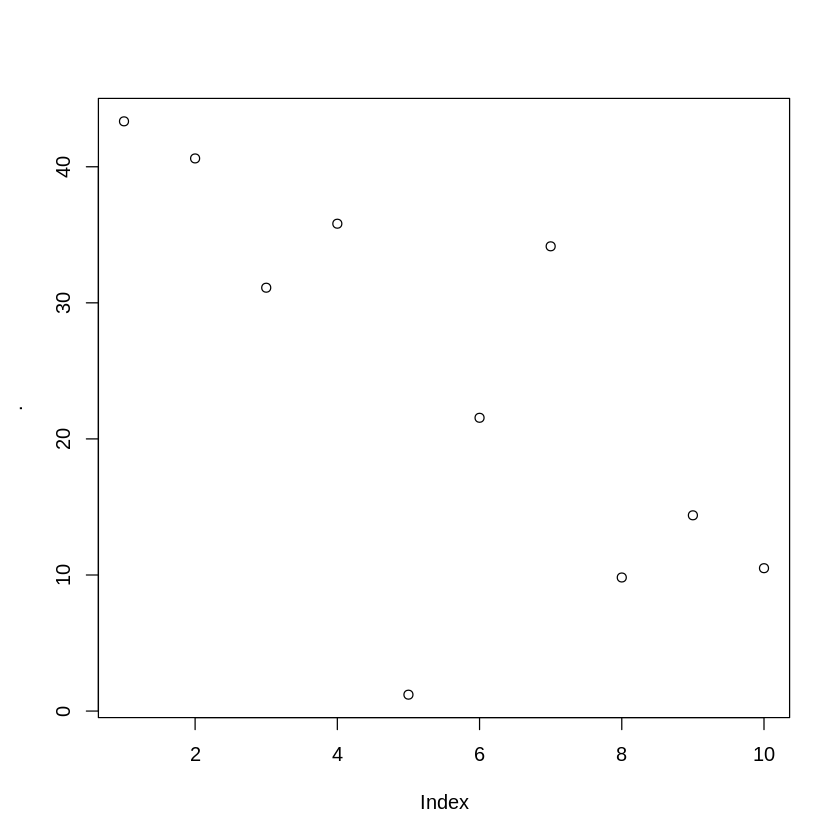

In [13]:
generate_uniform_samples() %>% plot

Sample Distribution Generators

In [14]:
rescale_to_minus_one_one <- function(x) {
  (x - min(x)) / (max(x) - min(x)) * 2 - 1
}

## original generator that lacks enough variation
# generate_normal_samples <- function(n = 100, q=10, mean_value = 0, sd_value = 1) {
#     samples <- rnorm(n, mean = mean_value, sd = sd_value)
#     samples_q <- quantile(samples,(seq(0,1,1/(q-1))))
#     samples_q <- rescale_to_minus_one_one(samples_q)
#     return(samples_q)
#     }

generate_normal_samples <- function(n = 1000, q = 10, mean_value = 0, sd_value = 1, mean_variation = 0.5, sd_variation = 0.5) {
  variable_mean <- mean_value + rnorm(1, 0, mean_variation)
  variable_sd <- sd_value + abs(rnorm(1, 0, sd_variation))

  samples <- rnorm(n, mean = variable_mean, sd = variable_sd)
  samples_q <- quantile(samples, seq(0, 1, 1 / (q - 1)))
  samples_q <- rescale_to_minus_one_one(samples_q)

  return(samples_q)
}

rescale_to_minus_one_one <- function(values) {
  min_value <- min(values)
  max_value <- max(values)
  scaled_values <- 2 * ((values - min_value) / (max_value - min_value)) - 1
  return(scaled_values)
}

generate_multimodal_samples <- function(ns = c(1000, 50), q = 10, means = c(1, -1), sds = c(1, 0.5), mean_variation = 0.5, sd_variation = 0.5) {

  samples_list <- lapply(seq_along(means), function(i) {
    variable_mean <- means[i] + rnorm(1, 0, mean_variation)
    variable_sd <- sds[i] + abs(rnorm(1, 0, sd_variation))
    rnorm(ns[i], mean = variable_mean, sd = variable_sd)
  })

  samples <- unlist(samples_list)
  samples_q <- quantile(samples, seq(0, 1, 1 / (q - 1)))
  samples_q <- rescale_to_minus_one_one(samples_q)

  return(samples_q)
}

rescale_to_minus_one_one <- function(values) {
  min_value <- min(values)
  max_value <- max(values)
  scaled_values <- 2 * ((values - min_value) / (max_value - min_value)) - 1
  return(scaled_values)
}

generate_uniform_samples <- function(n = 1000, q = 10, min_value = -1, max_value = 1, min_variation = 0.5, max_variation = 0.5) {

  variable_min <- min_value + runif(1, -min_variation, min_variation)
  variable_max <- max_value + runif(1, -max_variation, max_variation)

  # Ensure min is less than max
  if (variable_min > variable_max) {
    temp <- variable_min
    variable_min <- variable_max
    variable_max <- temp
  }

  samples <- runif(n, min = variable_min, max = variable_max)
  samples_q <- quantile(samples, seq(0, 1, 1 / (q - 1)))
  samples_q <- rescale_to_minus_one_one(samples_q)

  return(samples_q)
}

rescale_to_minus_one_one <- function(values) {
  min_value <- min(values)
  max_value <- max(values)
  scaled_values <- 2 * ((values - min_value) / (max_value - min_value)) - 1
  return(scaled_values)
}

generate_right_tailed_samples <- function(n = 1000, q = 10, mean = 0, sd = 1, mean_variation = 0.5, sd_variation = 0.5) {

  variable_mean <- mean + rnorm(1, 0, mean_variation)
  variable_sd <- sd + abs(rnorm(1, 0, sd_variation))

  samples <- rlnorm(n, meanlog = variable_mean, sdlog = variable_sd)
  samples_q <- quantile(samples, seq(0, 1, 1 / (q - 1)))
  samples_q <- rescale_to_minus_one_one(samples_q)

  return(samples_q)
}

generate_left_tailed_samples <- function(n = 1000, q = 10, mean = 0, sd = 1, mean_variation = 0.5, sd_variation = 0.5) {

  variable_mean <- mean + rnorm(1, 0, mean_variation)
  variable_sd <- sd + abs(rnorm(1, 0, sd_variation))

  samples <- -rlnorm(n, meanlog = variable_mean, sdlog = variable_sd)
  samples_q <- quantile(samples, seq(0, 1, 1 / (q - 1)))
  samples_q <- rescale_to_minus_one_one(samples_q)

  return(samples_q)
}

In [15]:
# generate_multimodal_samples <- function(ns = c(100,50), q=10, means = c(1,-1),sds = c(1,.5)) {
#     samples_list <- lapply(seq_along(means), function(i) {
#       rnorm(ns[i], mean = means[i], sd = sds[i])
#     })
#     samples <- unlist(samples_list)
#     samples_q <- quantile(samples,(seq(0,1,1/(q-1))))
#     samples_q <- rescale_to_minus_one_one(samples_q)
#     return(samples_q)
# }

# generate_uniform_samples <- function(n = 100, q=10,min_value = -1,max_value = 1) {
#   samples <- runif(n, min = min_value, max = max_value)
#   samples_q <- quantile(samples,(seq(0,1,1/(q-1))))
#   samples_q <- rescale_to_minus_one_one(samples_q)
#   return(samples_q)
# }

# generate_right_tailed_samples <- function(n = 100, q=10, mean = 0, sd = 1) {

#   samples <- rlnorm(n, meanlog = mean, sdlog = sd)
#   samples_q <- quantile(samples,(seq(0,1,1/(q-1))))
#   samples_q <- rescale_to_minus_one_one(samples_q)
#   return(samples_q)

# }

# generate_left_tailed_samples <- function(n = 100, q=10, mean = 0, sd = 1) {
#   samples <- -rlnorm(n, meanlog = mean, sdlog = sd)
#   # samples <- scales::rescale(samples, to = c(min_value, max_value))
#   samples_q <- quantile(samples,(seq(0,1,1/(q-1))))
#   samples_q <- rescale_to_minus_one_one(samples_q)
#   return(samples_q)
# }

In [16]:
# Generate training data for each distribution
set.seed(123)  # Set seed for reproducibility

generate_training_data <- function(n_samples = 1000) {
  data_list <- list()

  # Generate samples for each distribution type
  data_list$normal <- replicate(n_samples, generate_normal_samples(), simplify = FALSE)
  data_list$bimodal <- replicate(n_samples, generate_multimodal_samples(), simplify = FALSE)
  # data_list$multimodal <- replicate(n_samples, generate_multimodal_samples(), simplify = FALSE)
  data_list$uniform <- replicate(n_samples, generate_uniform_samples(), simplify = FALSE)
  data_list$right_tailed <- replicate(n_samples, generate_right_tailed_samples(), simplify = FALSE)
  data_list$left_tailed <- replicate(n_samples, generate_left_tailed_samples(), simplify = FALSE)

  # Combine all data into a single data frame
  combined_data <- do.call(rbind, lapply(names(data_list), function(name) {
    df <- data_list[[name]]
    df <- do.call(rbind, lapply(df, function(x) as.data.frame(t(x))))
    df$label <- name
    return(df)
  }))

  # Assign column names
  colnames(combined_data) <- c(paste0("V", 1:10), "label")

  return(combined_data)
}

# Generate training data
training_data <- generate_training_data()

training_data$label <- as.factor(training_data$label)

In [17]:
# training_data

In [18]:
# Train a Random Forest classifier
set.seed(123)  # Set seed for reproducibility
rf_model <- randomForest(label ~ ., data = training_data, ntree = 500)

# Print the model
print(rf_model)


Call:
 randomForest(formula = label ~ ., data = training_data, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 15.88%
Confusion matrix:
             bimodal left_tailed normal right_tailed uniform class.error
bimodal          583           0    417            0       0       0.417
left_tailed        0        1000      0            0       0       0.000
normal           377           0    623            0       0       0.377
right_tailed       0           0      0         1000       0       0.000
uniform            0           0      0            0    1000       0.000


In [19]:
# test_vec <- dt1[depth_top == 30]$imp_c %>% quantile(seq(0,1,1/9)) %>% rescale_to_minus_one_one

In [20]:
# test_dt <- test_vec %>% t %>% data.table
# colnames(test_dt) <- c(paste0("V", 1:10))

In [21]:
# predict(rf_model,test_dt,type='prob')

In [22]:
# dt1[depth_top == 30]$imp_c %>% qplot

In [23]:
soc_sf <- st_read('/content/annotated_combo_imputed_SOC.gpkg')

Reading layer `distribution_labeled' from data source 
  `/content/annotated_combo_imputed_SOC.gpkg' using driver `GPKG'
Simple feature collection with 6852 features and 15 fields (with 10 geometries empty)
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7518 ymin: 19.16063 xmax: 159.434 ymax: 22.22142
Geodetic CRS:  WGS 84


In [24]:
 dt1 <- as.data.table(soc_sf)
# dt1[, geom := st_as_text(geom)]

In [25]:
names(dt1)

[1] "source_dataset"   "island"           "soil_column_id"   "unique_id"       
 [5] "depth_top"        "depth_bottom"     "depth_adj_bottom" "latitude"        
 [9] "longitude"        "c_perc"           "imp_c"            "bulk_density"    
[13] "imp_bd"           "hole_id"          "dist_id"          "geom"

Examine and characterize distributions: group by dist_id, ignore the ones that aren't classified (NAs)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing argume

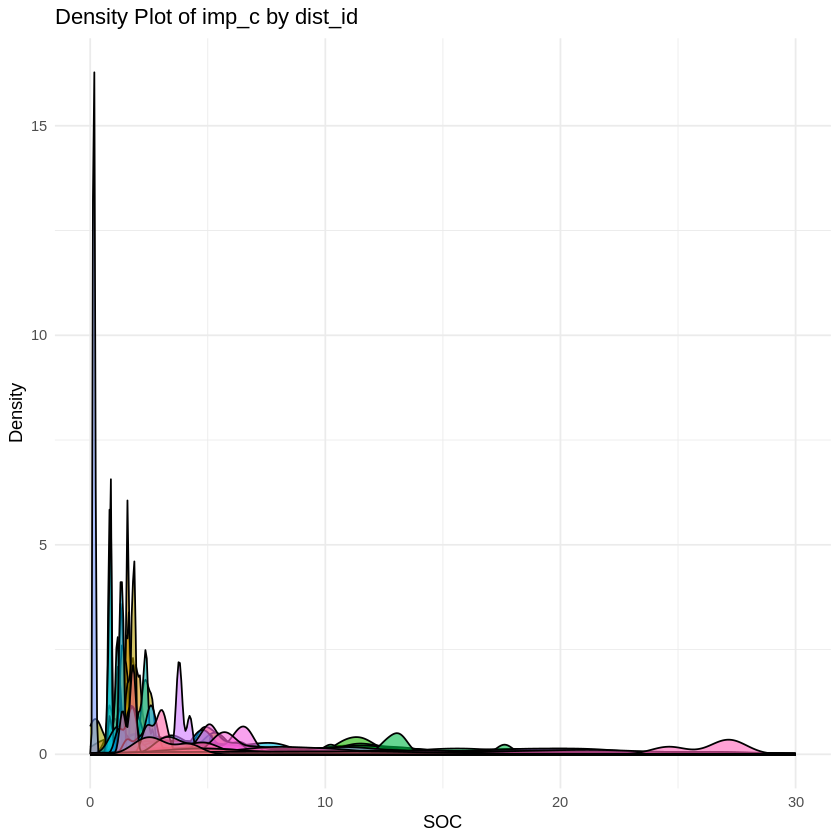

In [48]:
# Filter to include only rows where depth_adj_bottom = 20 and dist_id is not NA
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id)]

# Create the density plot
p <- ggplot(filtered_dt, aes(x = imp_c, fill = factor(dist_id))) +
  geom_density(alpha = 0.6) +
  labs(title = "Density Plot of imp_c by dist_id",
       x = "SOC",
       y = "Density",
       fill = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none") +
  xlim(0, 30)

p

# Save the plot with specified dimensions
# ggsave("density_plot_stretched.png", plot = p, width = 12, height = 6)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing argume

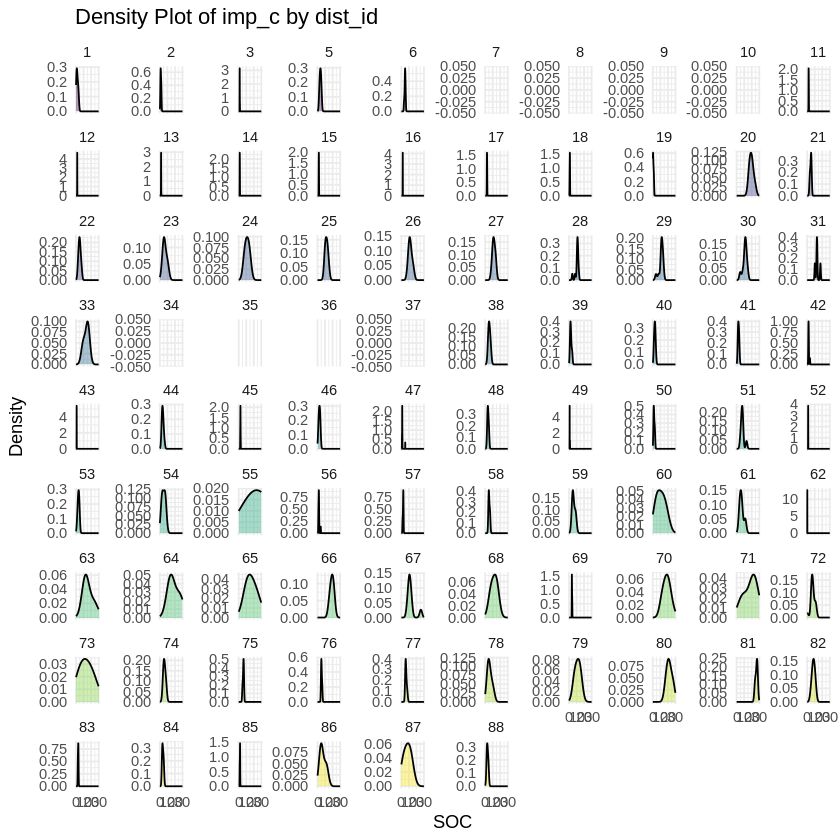

In [52]:
p <- ggplot(filtered_dt, aes(x = imp_c, fill = factor(dist_id))) +
  geom_density(alpha = 0.4, adjust = 1.5) +
  scale_fill_viridis_d() +
  labs(title = "Density Plot of imp_c by dist_id",
       x = "SOC",
       y = "Density",
       fill = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none") +  # Move legend to the right
  xlim(0, 30) +
  facet_wrap(~ dist_id, scales = "free_y")  # Faceting

p

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning mess

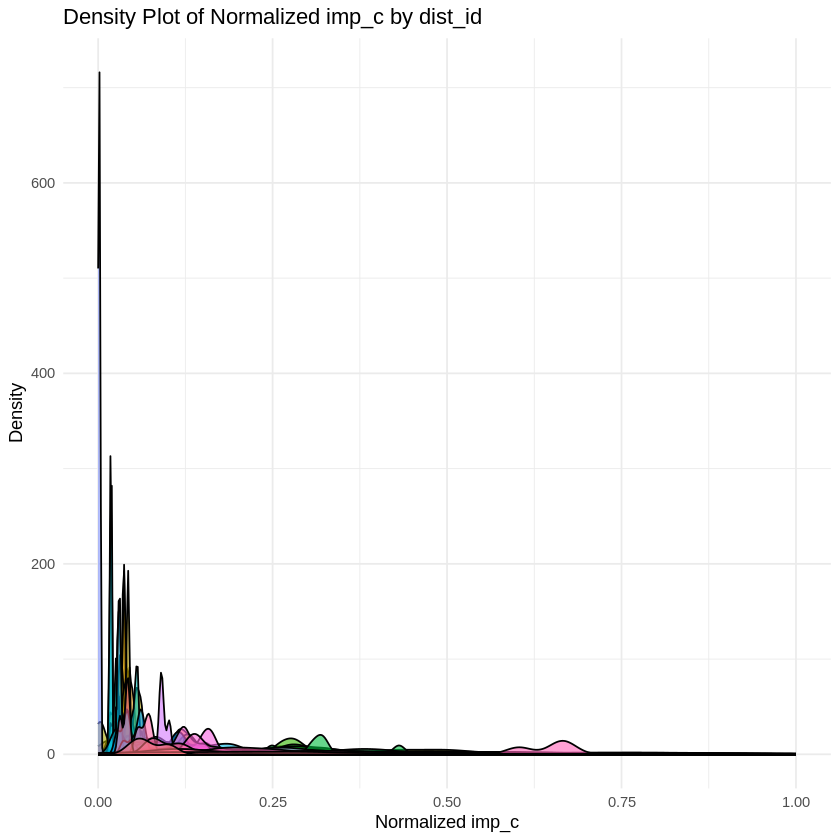

In [54]:
# Filter to include only rows where depth_adj_bottom = 20 and dist_id is not NA
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id)]

# Perform Min-Max normalization on imp_c
min_imp_c <- min(filtered_dt$imp_c, na.rm = TRUE)
max_imp_c <- max(filtered_dt$imp_c, na.rm = TRUE)
filtered_dt[, imp_c_norm := (imp_c - min_imp_c) / (max_imp_c - min_imp_c)]

# Create the density plot using normalized imp_c
p <- ggplot(filtered_dt, aes(x = imp_c_norm, fill = factor(dist_id))) +
  geom_density(alpha = 0.6) +
  labs(title = "Density Plot of Normalized imp_c by dist_id",
       x = "Normalized imp_c",
       y = "Density",
       fill = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none")

p

# Save the plot with specified dimensions
# ggsave("density_plot_normalized.png", plot = p, width = 12, height = 6)


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning mess

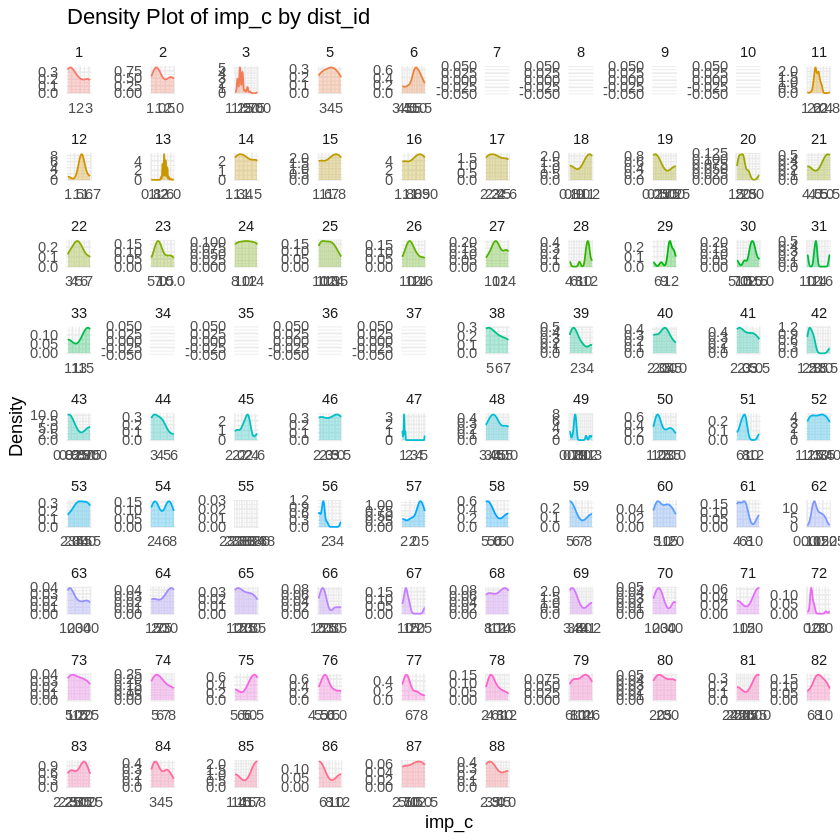

In [55]:
p2 <- ggplot(filtered_dt, aes(x = imp_c, fill = factor(dist_id), color = factor(dist_id))) +
  geom_density(alpha = 0.3) +
  labs(title = "Density Plot of imp_c by dist_id",
       x = "imp_c",
       y = "Density",
       fill = "dist_id",
       color = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none") +
  facet_wrap(~ dist_id, scales = "free")

p2

# ggsave("density_plot_faceted.png", plot = p2, width = 12, height = 6)

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning mess

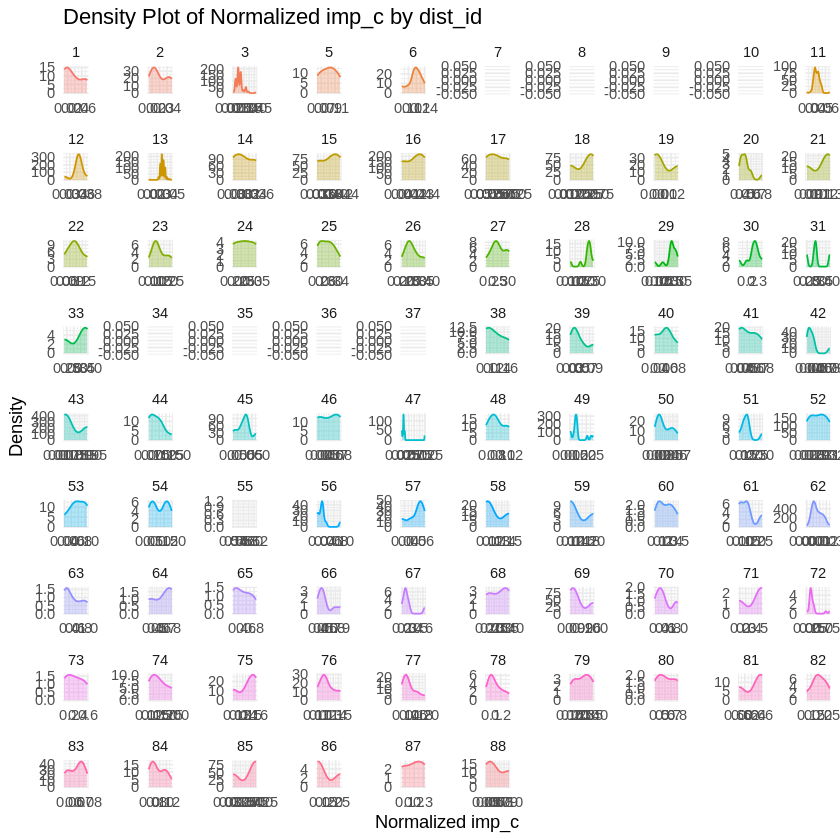

In [56]:
# Filter to include only rows where depth_adj_bottom = 20 and dist_id is not NA
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id)]

# Perform Min-Max normalization on imp_c
min_imp_c <- min(filtered_dt$imp_c, na.rm = TRUE)
max_imp_c <- max(filtered_dt$imp_c, na.rm = TRUE)
filtered_dt[, imp_c_norm := (imp_c - min_imp_c) / (max_imp_c - min_imp_c)]

# Create the faceted density plot using normalized imp_c
p3 <- ggplot(filtered_dt, aes(x = imp_c_norm, fill = factor(dist_id), color = factor(dist_id))) +
  geom_density(alpha = 0.3) +
  labs(title = "Density Plot of Normalized imp_c by dist_id",
       x = "Normalized imp_c",
       y = "Density",
       fill = "dist_id",
       color = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none") +
  facet_wrap(~ dist_id, scales = "free")

p3

# Save the plot with specified dimensions
# ggsave("density_plot_faceted_normalized.png", plot = p3, width = 12, height = 6)


In [92]:
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id) & dist_id %in% c(84:88)]

# Perform Min-Max normalization on imp_c
min_imp_c <- min(filtered_dt$imp_c, na.rm = TRUE)
max_imp_c <- max(filtered_dt$imp_c, na.rm = TRUE)
filtered_dt[, imp_c_norm := (imp_c - min_imp_c) / (max_imp_c - min_imp_c)]


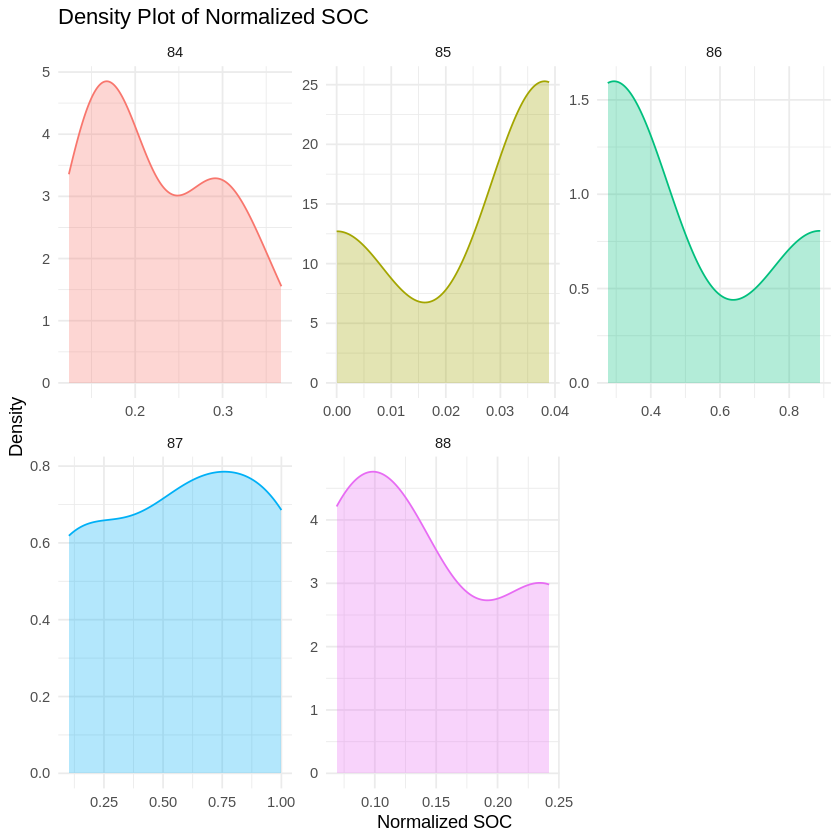

In [93]:
# Create the faceted density plot using normalized imp_c
p3 <- ggplot(filtered_dt, aes(x = imp_c_norm, fill = factor(dist_id), color = factor(dist_id))) +
  geom_density(alpha = 0.3) +
  labs(title = "Density Plot of Normalized SOC",
       x = "Normalized SOC",
       y = "Density",
       fill = "dist_id",
       color = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none") +
  facet_wrap(~ dist_id, scales = "free")  # Faceting by selected dist_id

p3


   source_dataset island soil_column_id unique_id depth_top depth_bottom
           <char> <char>         <char>    <char>     <int>        <num>
1:          HISOC   Maui       HISOC626 HISOC1852         0           11
2:          HISOC   Maui       HISOC627 HISOC1853         0           11
3:          HISOC   Maui       HISOC627 HISOC1854        11           20
4:          HISOC   Maui       HISOC627 HISOC1855        20           34
5:          HISOC   Maui       HISOC628 HISOC1856         0           10
6:          HISOC   Maui       HISOC629 HISOC1857         0           10
   depth_adj_bottom latitude longitude c_perc    imp_c bulk_density    imp_bd
              <int>    <num>     <num>  <num>    <num>        <num>     <num>
1:               20  20.7479  -156.359    5.0 4.485207         1.01 1.0174236
2:               20  20.7479  -156.359    3.9 3.498462         0.86 0.8663211
3:               20  20.7479  -156.359    2.8 2.693399         0.83 0.8361006
4:               20  20.74

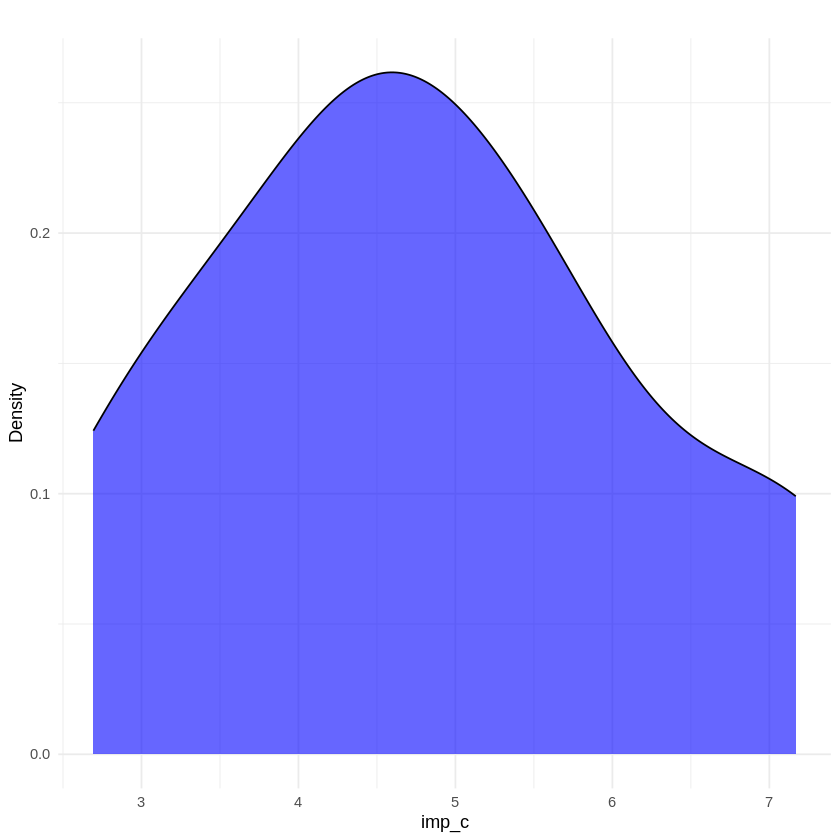

In [30]:
# Filter to include only rows where depth_adj_bottom = 20, dist_id is not NA, and dist_id = 88
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id) & dist_id == 22]

# Verify that the subset is correct
print(head(filtered_dt))

# Create the density plot
p <- ggplot(filtered_dt, aes(x = imp_c)) +
  geom_density(alpha = 0.6, fill = "blue") +
  labs(title = "",
       x = "imp_c",
       y = "Density") +
  theme_minimal()

print(p)

# Save the plot
# ggsave("plot_dist_id_88.png", plot = p)


In [31]:
# Filter to include only rows where depth_adj_bottom = 20 and dist_id is not NA
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id)]

# Perform Min-Max normalization on imp_c
min_imp_c <- min(filtered_dt$imp_c, na.rm = TRUE)
max_imp_c <- max(filtered_dt$imp_c, na.rm = TRUE)
filtered_dt[, imp_c_norm := (imp_c - min_imp_c) / (max_imp_c - min_imp_c)]

# Create the cumulative density plot using normalized imp_c
p <- ggplot(filtered_dt, aes(x = imp_c_norm, color = factor(dist_id), group = dist_id)) +
  stat_ecdf(geom = "step", linewidth = 1) +
  labs(title = "Cumulative Density Plot of Normalized imp_c by dist_id",
       x = "Normalized imp_c",
       y = "Cumulative Density",
       color = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none")

# Save the plot with specified dimensions
ggsave("cumulative_density_plot_normalized.png", plot = p, width = 12, height = 6)


do cumulative density plot but with smoothed (loess)

In [32]:
# Filter to include only rows where depth_adj_bottom = 20 and dist_id is not NA
filtered_dt <- dt1[depth_adj_bottom == 20 & !is.na(dist_id)]

# Perform Min-Max normalization on imp_c
min_imp_c <- min(filtered_dt$imp_c, na.rm = TRUE)
max_imp_c <- max(filtered_dt$imp_c, na.rm = TRUE)
filtered_dt[, imp_c_norm := (imp_c - min_imp_c) / (max_imp_c - min_imp_c)]

# Create the cumulative density plot using normalized imp_c
p <- ggplot(filtered_dt, aes(x = imp_c_norm, color = factor(dist_id), group = dist_id)) +
  stat_ecdf(geom = "step", linewidth = 1) +
  labs(title = "Cumulative Density Plot of Normalized imp_c by dist_id",
       x = "Normalized imp_c",
       y = "Cumulative Density",
       color = "dist_id") +
  theme_minimal() +
  theme(legend.position = "none")

# Save the plot with specified dimensions
ggsave("cumulative_density_plot_normalized.png", plot = p, width = 12, height = 6)

In [33]:
dip54 <- dip(filtered_dt[dist_id==54]$imp_c,full.result = TRUE)%>% print()


Call:
dip(x = filtered_dt[dist_id == 54]$imp_c, full.result = TRUE)

n = 12.  Dip statistic, D_n = 0.1628151 = 3.907563/(2n)
 Modal interval [xL, xU] = [x[7], x[11]] = [6.590178, 7.127574]
 GCM and LCM have 2 and 4 nodes inside [xL, xU], respectively.


In [34]:
dipt54 <- dip.test(filtered_dt[dist_id==54]$imp_c) %>% print()


	Hartigans' dip test for unimodality / multimodality

data:  filtered_dt[dist_id == 54]$imp_c
D = 0.16282, p-value = 0.00216
alternative hypothesis: non-unimodal, i.e., at least bimodal



In [35]:
dipt3 <- dip.test(filtered_dt[dist_id==3]$imp_c) %>% print()


	Hartigans' dip test for unimodality / multimodality

data:  filtered_dt[dist_id == 3]$imp_c
D = 0.14286, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal



In [36]:
dipt11 <- dip.test(filtered_dt[dist_id==11]$imp_c) %>% print()


	Hartigans' dip test for unimodality / multimodality

data:  filtered_dt[dist_id == 11]$imp_c
D = 0.1068, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal



In [37]:
dipt67 <- dip.test(filtered_dt[dist_id==67]$imp_c) %>% print()


	Hartigans' dip test for unimodality / multimodality

data:  filtered_dt[dist_id == 67]$imp_c
D = 0.067798, p-value = 0.9722
alternative hypothesis: non-unimodal, i.e., at least bimodal



In [38]:
filtered_dt[dist_id==67]$imp_c

[1]  9.264000 13.638265  7.881854 25.948128 10.981460 10.797878 10.150005
[8] 11.337772 12.741496

In [39]:
dispersion_test <- function(x)
{
  res <- 1-2 * abs((1 - pchisq((sum((x - mean(x))^2)/mean(x)), length(x) - 1))-0.5)

  # cat("Dispersion test of count data:\n",
  #     length(x), " data points.\n",
  #     "Mean: ",mean(x),"\n",
  #     "Variance: ",var(x),"\n",
  #     "Probability of being drawn from Poisson distribution: ",
  #     round(res, 3),"\n", sep = "")

  return(res)
}

In [40]:
# Generate sample data (replace this with your actual data)
# set.seed(123)
ppois_p <-
unique(filtered_dt$dist_id) %>%
  lapply(function(x){
data <- filtered_dt[dist_id==x]$imp_c

# print(mean(data))
# Kolmogorov-Smirnov Test
p_test <- dispersion_test(data %>% quantile( seq(0,1,.1)))
data.table(dist_id = x,p =p_test %>% unlist)
  }) %>% rbindlist


In [41]:
dist_classify <- function(data){
# # Kolmogorov-Smirnov Test
pois_ks_test <- dispersion_test(data)
# print(ks_test)


# # Kolmogorov-Smirnov Test
norm_ks_test <- ks.test(data,"pnorm",mean(data),sd(data))
# print(ks_test)

# # Kolmogorov-Smirnov Test
unif_ks_test <- ks.test(data,"punif",min(data), max(data))
# print(ks_test$p.value)

dip_test <- dip.test(data)
# print(dip_test$p.value)

data.table('ppois' = pois_ks_test,'pnorm' = norm_ks_test$p.value,'unif'=unif_ks_test$p.value,'bimod' = dip_test$p.value) }

In [42]:
test_data <- generate_training_data(1000)

In [43]:
forest_pred <- predict(rf_model,test_data)

In [44]:
test_data$forest_pred <- forest_pred

In [45]:
scale_to_neg1_pos1 <- function(values) {
  min_value <- min(values)
  max_value <- max(values)

  scaled_values <- 2 * ((values - min_value) / (max_value - min_value)) - 1

  return(scaled_values)
}

In [46]:
results_dt$distribution %>% unique

ERROR: Error in eval(expr, envir, enclos): object 'results_dt' not found


In [ ]:
results_dt <-  filtered_dt$dist_id %>% unique  %>%
  lapply(function(x){
  data = filtered_dt[dist_id==x]$imp_c
  data_vec <- quantile(data,seq(0,1,1/9))
  predict_dt <- data.table(scale_to_neg1_pos1(data_vec) %>% unlist %>% t)
  names(predict_dt) <- paste0('V',1:ncol(predict_dt))
  predict_dt$dist_id <- x
  predict_dt$distribution <- predict(rf_model, predict_dt,probs=T)
  predict_dt
  }) %>% rbindlist

In [ ]:
results_dt[distribution == "bimodal" ]

In [ ]:
table(test_data$label,test_data$forest_pred)

In [ ]:
check_data <-
1:nrow(test_data) %>%
  lapply(function(x){
  data <- test_data[x,1:10] %>% unlist
  dist_id <- filtered_dt$dist_id %>% unique %>% sample(1)
  original_min <- min(filtered_dt[dist_id == dist_id]$imp_c,na.rm=T)
  original_max <- max(filtered_dt[dist_id == dist_id]$imp_c,na.rm=T)

  data <- (data * (original_max - original_min)) + original_min
  data_out <- dist_classify(test_data[x,1:10] %>% unlist)
  data_out$best_dist <- names(data_out)[which.max(data_out)]
  data_out
  }) %>% rbindlist

In [ ]:
test_data

In [ ]:
table(test_data$label, check_data$best_dist)

In [ ]:
data_orig = filtered_dt[dist_id==12]$imp_c

data_orig <- (data_orig - min(data_orig))/max(data_orig)

data = quantile(data_orig,seq(0,1,.1))
plot(data)
dist_classify(data)